# Goal
Create a really highly autocorrelated plot. Do one in pystan and do one in pymc3!

In [1]:
import numpy as np
import pymc3 as pm
import pystan
import arviz as az

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7feb6bdccd30>],
      dtype=object)

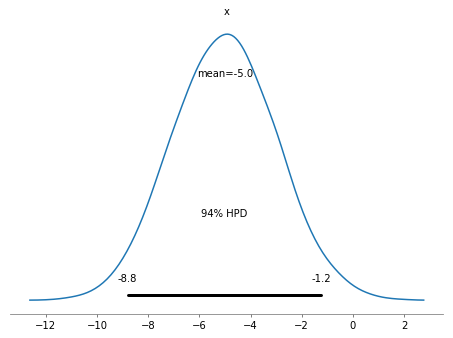

In [2]:
# Generate Gaussian
obs = np.random.normal(loc=-5, scale=2, size=10000)
obs
az.plot_posterior(obs)

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
INFO:pymc3:Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sd, mu]
INFO:pymc3:NUTS: [sd, mu]
Sampling 4 chains: 100%|██████████| 4000/4000 [00:00<00:00, 4117.65draws/s]
The acceptance probability does not match the target. It is 0.8841433650091869, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8939682748884736, but should be close to 0.8. Try to increase the number of tuning steps.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7feb5d980668>,
      dtype=object)

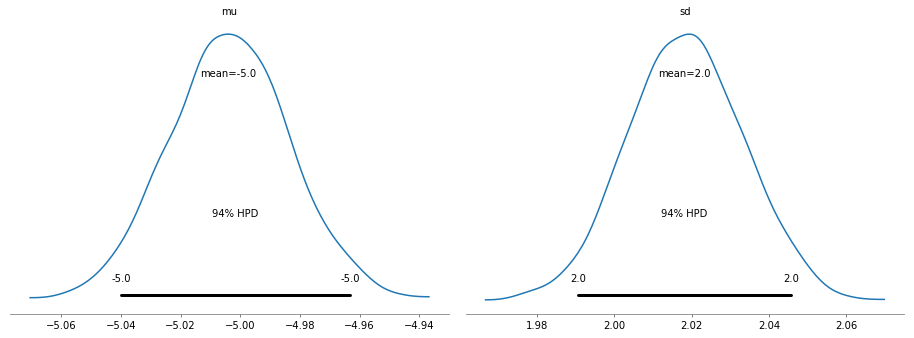

In [3]:
with pm.Model() as model:
    mu = pm.Normal("mu", mu=0, sd=1)
    sd = pm.HalfNormal("sd", sd=1)
    y = pm.Normal("y", mu=mu, sd=sd, observed=obs)
    trace = pm.sample()
    
az.plot_posterior(trace)

Multiprocess sampling (2 chains in 4 jobs)
INFO:pymc3:Multiprocess sampling (2 chains in 4 jobs)
CompoundStep
INFO:pymc3:CompoundStep
>Metropolis: [sd]
INFO:pymc3:>Metropolis: [sd]
>Metropolis: [mu]
INFO:pymc3:>Metropolis: [mu]
Sampling 2 chains: 100%|██████████| 11000/11000 [00:01<00:00, 6980.30draws/s]
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feb6a5e7048>,
      dtype=object)

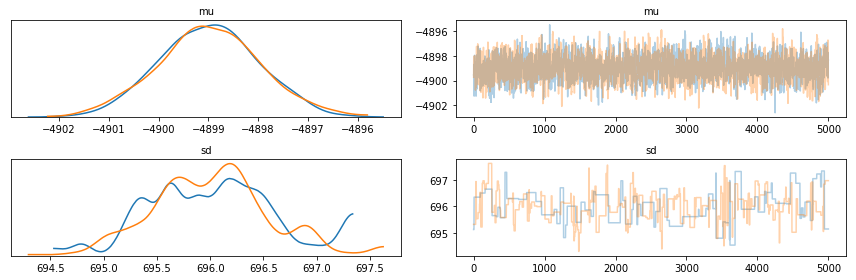

In [10]:
with pm.Model() as model:
    mu = pm.Normal("mu", mu=-5000, sd=1)
    sd = pm.HalfNormal("sd", sd=1)
    y = pm.Normal("y", mu=mu, sd=sd, observed=obs)
    step = pm.Metropolis()
    trace = pm.sample(5000, step, chains=2)
az.plot_trace(trace)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feb6a5e7b38>,
      dtype=object)

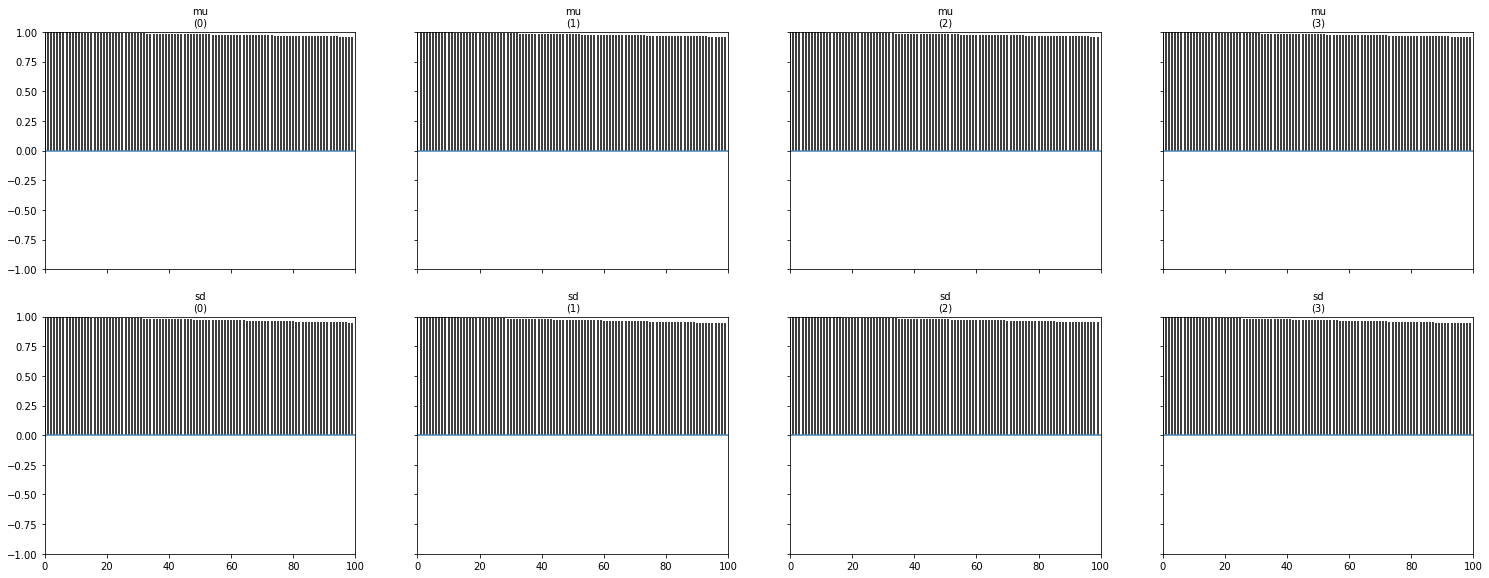

In [7]:
az.plot_autocorr(trace)